In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = os.path.join('../data/fig1/lr_embed_phy_R2_0.950995.csv')
R2_df = pd.read_csv(data_file)
city_order = R2_df.groupby('area')['R2_embed'].mean().sort_values(ascending=False).index.tolist()

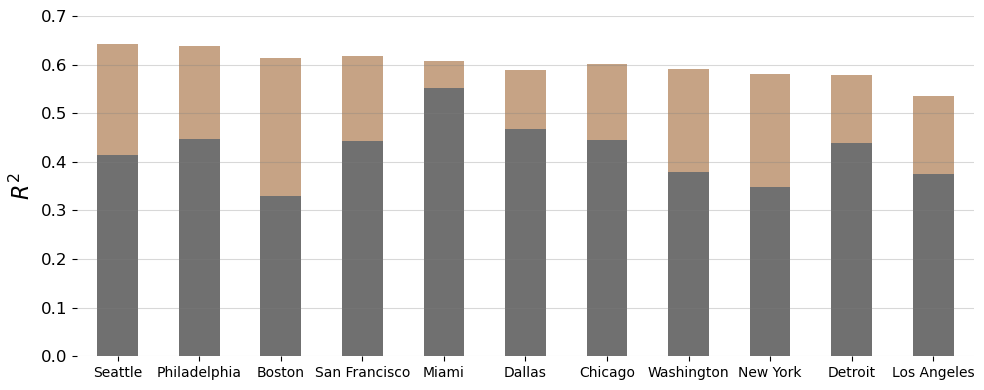

In [3]:
legend_color = ['#C68B59', '#707070'] 

year = 2019

f, ax = plt.subplots(1,1, figsize=(10, 4))

year_df = R2_df[R2_df['origin_year'] == year].copy()
year_df = year_df.set_index('area').loc[city_order].reset_index()

sns.barplot(y="R2_embed", x="area", data=year_df, color=legend_color[0], ax=ax, width=0.5, alpha=0.8)
sns.barplot(y="R2_phy", x="area", data=year_df, color=legend_color[1], ax=ax, width=0.5)

sns.despine(left=True, bottom=True)
# ax.xaxis.grid(True, linestyle='-', color='gray', alpha=0.3)
ax.yaxis.grid(True, linestyle='-', color='gray', alpha=0.3)
ax.set_ylim(0, 0.7)
ax.set_xlabel('')
ax.set_ylabel('$R^2$', fontsize=16)
ax.tick_params(axis='y', which='major', labelsize=12)

f.tight_layout()
plt.savefig(
    os.path.join('../outputs/fig1_d.pdf'),
    dpi=300,
    bbox_inches='tight'
)